In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from sklearn.preprocessing import StandardScaler #표준화
from sklearn.preprocessing import MinMaxScaler #정규화



# 경고문구 삭제

import warnings
warnings.filterwarnings('ignore')


In [2]:

# import FinanceDataReader as fdr
# import exchange_calendars as ecals 

# #맷플롯 한글화
# import matplotlib as mpl
# import matplotlib.font_manager as fm

# mpl.rcParams['axes.unicode_minus']= False

# path = 'C:/Windows/Fonts/malgun.ttf'
# font_name = fm.FontProperties(fname = path, size = 50).get_name()
# plt.rc('font', family=font_name)



In [3]:
from sklearn.model_selection import train_test_split #훈련분리


import tensorflow as tf
from tensorflow.keras.layers import * #케라스
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.models import Sequential



In [4]:
import io #코랩

from google.colab import drive #코랩파일열기
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

In [5]:
#연속데이터 (시계열 : 회귀모델사용)

In [ ]:
#회귀 LSTM사용.

# 데이터 표준화구현

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/비트캠프_최종/증권4개년_4차프로젝트_감성어(12.1).csv')
df

In [ ]:
# df=pd.read_csv('./전처리 데이터/증권4개년_4차프로젝트_감성어.csv')
# df

In [ ]:
df1=df.iloc[:,1:] #Date 칼럼 뺀다
df1.head()

Close     Open     High      Low  ...     갭  일변동  비율점수b  종가증감b
0  2026.16  2022.23  2031.79  2015.68  ...   NaN  1.0    NaN    NaN
1  2043.97  2034.31  2044.07  2028.47  ...  8.15  1.0    1.0    1.0
2  2045.64  2046.29  2046.29  2040.61  ...  2.32  0.0    1.0    1.0
3  2041.95  2045.52  2046.50  2039.49  ... -0.12  0.0    1.0   -1.0
4  2049.12  2048.11  2051.84  2045.66  ...  6.16  0.0    1.0    1.0

[5 rows x 58 columns]

In [ ]:
ss = StandardScaler() #표준화
ss_df = ss.fit(df1)
ss_df1= ss.transform(df1)
ss_df1

array([[-1.06417576, -1.08775583, -1.10240926, ...,  0.22180591,
                nan,         nan],
       [-0.97562366, -1.02765449, -1.04088427, ...,  0.22180591,
         0.14797909,  0.88787452],
       [-0.96732035, -0.96805067, -1.02976167, ..., -4.50844618,
         0.14797909,  0.88787452],
       ...,
       [ 2.82615   ,  2.88609729,  2.91976173, ...,  0.22180591,
         0.14797909,  0.88787452],
       [ 2.88536704,  2.83435441,  2.86389825, ...,  0.22180591,
         0.14797909,  0.88787452],
       [ 3.14868646,  2.88316188,  3.1383057 , ...,  0.22180591,
         0.14797909,  0.88787452]])

In [ ]:
df1

Close     Open     High      Low  ...      갭  일변동  비율점수b  종가증감b
0    2026.16  2022.23  2031.79  2015.68  ...    NaN  1.0    NaN    NaN
1    2043.97  2034.31  2044.07  2028.47  ...   8.15  1.0    1.0    1.0
2    2045.64  2046.29  2046.29  2040.61  ...   2.32  0.0    1.0    1.0
3    2041.95  2045.52  2046.50  2039.49  ...  -0.12  0.0    1.0   -1.0
4    2049.12  2048.11  2051.84  2045.66  ...   6.16  0.0    1.0    1.0
..       ...      ...      ...      ...  ...    ...  ...    ...    ...
976  2759.82  2737.74  2769.08  2716.28  ...   4.06  1.0    1.0    1.0
977  2806.86  2762.60  2812.16  2762.60  ...   2.78  1.0    1.0    1.0
978  2808.60  2820.95  2834.59  2799.56  ...  14.09  1.0    1.0    1.0
979  2820.51  2810.55  2823.44  2792.06  ...   1.95  1.0    1.0    1.0
980  2873.47  2820.36  2878.21  2809.35  ...  -0.15  1.0    1.0    1.0

[981 rows x 58 columns]

In [ ]:
m2 = pd.DataFrame(ss_df1) #표준화 거친 데이터 df화
m2.index = df1.index #인덱스명 적용
m2.columns= df1.columns #칼럼명 적용

In [ ]:
m2

Close      Open      High  ...       일변동     비율점수b     종가증감b
0   -1.064176 -1.087756 -1.102409  ...  0.221806       NaN       NaN
1   -0.975624 -1.027654 -1.040884  ...  0.221806  0.147979  0.887875
2   -0.967320 -0.968051 -1.029762  ... -4.508446  0.147979  0.887875
3   -0.985667 -0.971882 -1.028710  ... -4.508446  0.147979 -1.126285
4   -0.950018 -0.958996 -1.001955  ... -4.508446  0.147979  0.887875
..        ...       ...       ...  ...       ...       ...       ...
976  2.583614  2.472105  2.591545  ...  0.221806  0.147979  0.887875
977  2.817499  2.595790  2.807383  ...  0.221806  0.147979  0.887875
978  2.826150  2.886097  2.919762  ...  0.221806  0.147979  0.887875
979  2.885367  2.834354  2.863898  ...  0.221806  0.147979  0.887875
980  3.148686  2.883162  3.138306  ...  0.221806  0.147979  0.887875

[981 rows x 58 columns]

In [ ]:
m1=df['Date']

In [ ]:
표준화df=pd.concat([m1,m2],axis=1)
표준화df

Date     Close      Open  ...       일변동     비율점수b     종가증감b
0    2017-01-02 -1.064176 -1.087756  ...  0.221806       NaN       NaN
1    2017-01-03 -0.975624 -1.027654  ...  0.221806  0.147979  0.887875
2    2017-01-04 -0.967320 -0.968051  ... -4.508446  0.147979  0.887875
3    2017-01-05 -0.985667 -0.971882  ... -4.508446  0.147979 -1.126285
4    2017-01-06 -0.950018 -0.958996  ... -4.508446  0.147979  0.887875
..          ...       ...       ...  ...       ...       ...       ...
976  2020-12-23  2.583614  2.472105  ...  0.221806  0.147979  0.887875
977  2020-12-24  2.817499  2.595790  ...  0.221806  0.147979  0.887875
978  2020-12-28  2.826150  2.886097  ...  0.221806  0.147979  0.887875
979  2020-12-29  2.885367  2.834354  ...  0.221806  0.147979  0.887875
980  2020-12-30  3.148686  2.883162  ...  0.221806  0.147979  0.887875

[981 rows x 59 columns]

In [ ]:
표준화df.to_csv('/content/drive/MyDrive/비트캠프_최종/증권4개년_4차프로젝트_표준화(12.1).csv', encoding='utf-8-sig', index=False)

In [ ]:
# 표준화df.to_csv('./전처리 데이터/증권4개년_4차프로젝트_표준화.csv', encoding='utf-8-sig', index=False)

In [ ]:
표준화df

Date     Close      Open  ...       일변동     비율점수b     종가증감b
0    2017-01-02 -1.064176 -1.087756  ...  0.221806       NaN       NaN
1    2017-01-03 -0.975624 -1.027654  ...  0.221806  0.147979  0.887875
2    2017-01-04 -0.967320 -0.968051  ... -4.508446  0.147979  0.887875
3    2017-01-05 -0.985667 -0.971882  ... -4.508446  0.147979 -1.126285
4    2017-01-06 -0.950018 -0.958996  ... -4.508446  0.147979  0.887875
..          ...       ...       ...  ...       ...       ...       ...
976  2020-12-23  2.583614  2.472105  ...  0.221806  0.147979  0.887875
977  2020-12-24  2.817499  2.595790  ...  0.221806  0.147979  0.887875
978  2020-12-28  2.826150  2.886097  ...  0.221806  0.147979  0.887875
979  2020-12-29  2.885367  2.834354  ...  0.221806  0.147979  0.887875
980  2020-12-30  3.148686  2.883162  ...  0.221806  0.147979  0.887875

[981 rows x 59 columns]

In [ ]:
표준화df.iloc[:, 1:]

Close      Open      High  ...       일변동     비율점수b     종가증감b
0   -1.064176 -1.087756 -1.102409  ...  0.221806       NaN       NaN
1   -0.975624 -1.027654 -1.040884  ...  0.221806  0.147979  0.887875
2   -0.967320 -0.968051 -1.029762  ... -4.508446  0.147979  0.887875
3   -0.985667 -0.971882 -1.028710  ... -4.508446  0.147979 -1.126285
4   -0.950018 -0.958996 -1.001955  ... -4.508446  0.147979  0.887875
..        ...       ...       ...  ...       ...       ...       ...
976  2.583614  2.472105  2.591545  ...  0.221806  0.147979  0.887875
977  2.817499  2.595790  2.807383  ...  0.221806  0.147979  0.887875
978  2.826150  2.886097  2.919762  ...  0.221806  0.147979  0.887875
979  2.885367  2.834354  2.863898  ...  0.221806  0.147979  0.887875
980  3.148686  2.883162  3.138306  ...  0.221806  0.147979  0.887875

[981 rows x 58 columns]

In [ ]:
표준화df

Date     Close      Open  ...       일변동     비율점수b     종가증감b
0    2017-01-02 -1.064176 -1.087756  ...  0.221806       NaN       NaN
1    2017-01-03 -0.975624 -1.027654  ...  0.221806  0.147979  0.887875
2    2017-01-04 -0.967320 -0.968051  ... -4.508446  0.147979  0.887875
3    2017-01-05 -0.985667 -0.971882  ... -4.508446  0.147979 -1.126285
4    2017-01-06 -0.950018 -0.958996  ... -4.508446  0.147979  0.887875
..          ...       ...       ...  ...       ...       ...       ...
976  2020-12-23  2.583614  2.472105  ...  0.221806  0.147979  0.887875
977  2020-12-24  2.817499  2.595790  ...  0.221806  0.147979  0.887875
978  2020-12-28  2.826150  2.886097  ...  0.221806  0.147979  0.887875
979  2020-12-29  2.885367  2.834354  ...  0.221806  0.147979  0.887875
980  2020-12-30  3.148686  2.883162  ...  0.221806  0.147979  0.887875

[981 rows x 59 columns]

In [ ]:
표준화df1= 표준화df.dropna(axis=0)


In [ ]:
표준화df1.reset_index(drop=True, inplace=True) #인덱스 재지정 : drop 원래인덱스 살려라 , inplace 해당값에 영구저장
표준화df1

Date     Close      Open  ...       일변동     비율점수b     종가증감b
0    2017-09-21  0.826891  0.851508  ...  0.221806  0.147979 -1.126285
1    2017-09-22  0.738439  0.813397  ...  0.221806  0.147979 -1.126285
2    2017-09-25  0.697121  0.735882  ...  0.221806  0.147979 -1.126285
3    2017-09-26  0.666891  0.650556  ...  0.221806  0.147979 -1.126285
4    2017-09-27  0.658190  0.676776  ... -4.508446  0.147979 -1.126285
..          ...       ...       ...  ...       ...       ...       ...
797  2020-12-23  2.583614  2.472105  ...  0.221806  0.147979  0.887875
798  2020-12-24  2.817499  2.595790  ...  0.221806  0.147979  0.887875
799  2020-12-28  2.826150  2.886097  ...  0.221806  0.147979  0.887875
800  2020-12-29  2.885367  2.834354  ...  0.221806  0.147979  0.887875
801  2020-12-30  3.148686  2.883162  ...  0.221806  0.147979  0.887875

[802 rows x 59 columns]

# 표준화로 딥 러닝한 결과가 좋지않아 데이터를 정규화 시킴

In [6]:
df2=pd.read_csv('/content/drive/MyDrive/비트캠프_최종/증권4개년_4차프로젝트_감성어(12.1).csv')
df2

Date    Close     Open     High  ...      갭  일변동  비율점수b  종가증감b
0    2017-01-02  2026.16  2022.23  2031.79  ...    NaN  1.0    NaN    NaN
1    2017-01-03  2043.97  2034.31  2044.07  ...   8.15  1.0    1.0    1.0
2    2017-01-04  2045.64  2046.29  2046.29  ...   2.32  0.0    1.0    1.0
3    2017-01-05  2041.95  2045.52  2046.50  ...  -0.12  0.0    1.0   -1.0
4    2017-01-06  2049.12  2048.11  2051.84  ...   6.16  0.0    1.0    1.0
..          ...      ...      ...      ...  ...    ...  ...    ...    ...
976  2020-12-23  2759.82  2737.74  2769.08  ...   4.06  1.0    1.0    1.0
977  2020-12-24  2806.86  2762.60  2812.16  ...   2.78  1.0    1.0    1.0
978  2020-12-28  2808.60  2820.95  2834.59  ...  14.09  1.0    1.0    1.0
979  2020-12-29  2820.51  2810.55  2823.44  ...   1.95  1.0    1.0    1.0
980  2020-12-30  2873.47  2820.36  2878.21  ...  -0.15  1.0    1.0    1.0

[981 rows x 59 columns]

In [7]:
df3=df2.iloc[:,1:] #Date 칼럼 뺀다
df3.head()

Close     Open     High      Low  ...     갭  일변동  비율점수b  종가증감b
0  2026.16  2022.23  2031.79  2015.68  ...   NaN  1.0    NaN    NaN
1  2043.97  2034.31  2044.07  2028.47  ...  8.15  1.0    1.0    1.0
2  2045.64  2046.29  2046.29  2040.61  ...  2.32  0.0    1.0    1.0
3  2041.95  2045.52  2046.50  2039.49  ... -0.12  0.0    1.0   -1.0
4  2049.12  2048.11  2051.84  2045.66  ...  6.16  0.0    1.0    1.0

[5 rows x 58 columns]

In [8]:
mm=MinMaxScaler() #정규화
mm.fit(df3)
mm1=mm.transform(df3)
m3=pd.DataFrame(mm1)
m3.index=df3.index
m3.columns=df3.columns

In [9]:
m4=df2['Date']

In [10]:
정규화df=pd.concat([m4,m3],axis=1)

In [11]:
정규화df1= 정규화df.dropna(axis=0)
정규화df1


Date     Close      Open      High  ...         갭  일변동  비율점수b  종가증감b
179  2017-09-21  0.670179  0.696294  0.659865  ...  0.614172  1.0    1.0    0.0
180  2017-09-22  0.657614  0.690605  0.655583  ...  0.603372  1.0    1.0    0.0
181  2017-09-25  0.651745  0.679035  0.643199  ...  0.615550  1.0    1.0    0.0
182  2017-09-26  0.647451  0.666298  0.635024  ...  0.566839  1.0    1.0    0.0
183  2017-09-27  0.646215  0.670212  0.631991  ...  0.629381  0.0    1.0    0.0
..          ...       ...       ...       ...  ...       ...  ...    ...    ...
976  2020-12-23  0.919729  0.938203  0.919843  ...  0.637591  1.0    1.0    1.0
977  2020-12-24  0.952953  0.956665  0.951486  ...  0.630538  1.0    1.0    1.0
978  2020-12-28  0.954182  1.000000  0.967961  ...  0.692859  1.0    1.0    1.0
979  2020-12-29  0.962594  0.992276  0.959771  ...  0.625964  1.0    1.0    1.0
980  2020-12-30  1.000000  0.999562  1.000000  ...  0.614393  1.0    1.0    1.0

[802 rows x 59 columns]

In [12]:
정규화df1.reset_index(drop=True, inplace=True) #인덱스 재지정 : drop 원래인덱스 살려라 , inplace 해당값에 영구저장

In [13]:
정규화df1

Date     Close      Open      High  ...         갭  일변동  비율점수b  종가증감b
0    2017-09-21  0.670179  0.696294  0.659865  ...  0.614172  1.0    1.0    0.0
1    2017-09-22  0.657614  0.690605  0.655583  ...  0.603372  1.0    1.0    0.0
2    2017-09-25  0.651745  0.679035  0.643199  ...  0.615550  1.0    1.0    0.0
3    2017-09-26  0.647451  0.666298  0.635024  ...  0.566839  1.0    1.0    0.0
4    2017-09-27  0.646215  0.670212  0.631991  ...  0.629381  0.0    1.0    0.0
..          ...       ...       ...       ...  ...       ...  ...    ...    ...
797  2020-12-23  0.919729  0.938203  0.919843  ...  0.637591  1.0    1.0    1.0
798  2020-12-24  0.952953  0.956665  0.951486  ...  0.630538  1.0    1.0    1.0
799  2020-12-28  0.954182  1.000000  0.967961  ...  0.692859  1.0    1.0    1.0
800  2020-12-29  0.962594  0.992276  0.959771  ...  0.625964  1.0    1.0    1.0
801  2020-12-30  1.000000  0.999562  1.000000  ...  0.614393  1.0    1.0    1.0

[802 rows x 59 columns]

In [14]:
정규화df1.to_csv('/content/drive/MyDrive/비트캠프_최종/증권4개년_4차프로젝트_정규화(12.1).csv', encoding='utf-8-sig', index=False)

In [15]:
정규화df1

Date     Close      Open      High  ...         갭  일변동  비율점수b  종가증감b
0    2017-09-21  0.670179  0.696294  0.659865  ...  0.614172  1.0    1.0    0.0
1    2017-09-22  0.657614  0.690605  0.655583  ...  0.603372  1.0    1.0    0.0
2    2017-09-25  0.651745  0.679035  0.643199  ...  0.615550  1.0    1.0    0.0
3    2017-09-26  0.647451  0.666298  0.635024  ...  0.566839  1.0    1.0    0.0
4    2017-09-27  0.646215  0.670212  0.631991  ...  0.629381  0.0    1.0    0.0
..          ...       ...       ...       ...  ...       ...  ...    ...    ...
797  2020-12-23  0.919729  0.938203  0.919843  ...  0.637591  1.0    1.0    1.0
798  2020-12-24  0.952953  0.956665  0.951486  ...  0.630538  1.0    1.0    1.0
799  2020-12-28  0.954182  1.000000  0.967961  ...  0.692859  1.0    1.0    1.0
800  2020-12-29  0.962594  0.992276  0.959771  ...  0.625964  1.0    1.0    1.0
801  2020-12-30  1.000000  0.999562  1.000000  ...  0.614393  1.0    1.0    1.0

[802 rows x 59 columns]

# LSTM 구현

In [124]:
정규화df1=pd.read_csv('/content/drive/MyDrive/비트캠프_최종/증권4개년_4차프로젝트_정규화(12.1).csv')
정규화df1

Date     Close      Open      High  ...         갭  일변동  비율점수b  종가증감b
0    2017-09-21  0.670179  0.696294  0.659865  ...  0.614172  1.0    1.0    0.0
1    2017-09-22  0.657614  0.690605  0.655583  ...  0.603372  1.0    1.0    0.0
2    2017-09-25  0.651745  0.679035  0.643199  ...  0.615550  1.0    1.0    0.0
3    2017-09-26  0.647451  0.666298  0.635024  ...  0.566839  1.0    1.0    0.0
4    2017-09-27  0.646215  0.670212  0.631991  ...  0.629381  0.0    1.0    0.0
..          ...       ...       ...       ...  ...       ...  ...    ...    ...
797  2020-12-23  0.919729  0.938203  0.919843  ...  0.637591  1.0    1.0    1.0
798  2020-12-24  0.952953  0.956665  0.951486  ...  0.630538  1.0    1.0    1.0
799  2020-12-28  0.954182  1.000000  0.967961  ...  0.692859  1.0    1.0    1.0
800  2020-12-29  0.962594  0.992276  0.959771  ...  0.625964  1.0    1.0    1.0
801  2020-12-30  1.000000  0.999562  1.000000  ...  0.614393  1.0    1.0    1.0

[802 rows x 59 columns]

In [125]:
x=정규화df1[['감성어점수','감성어_Change','감성어5일_Change',\
        '감성어5일이동평균'\
   ,'긍정비율','부정비율','중립비율','비율점수b']]

y=정규화df1['종가증감b']  #상승하면 +값, 하락하면 -값



In [126]:
y.isnull().sum()

0

In [127]:
기간=10 #window_size

In [128]:
x.head(11)

감성어점수  감성어_Change  감성어5일_Change  ...      부정비율      중립비율  비율점수b
0   0.456140    0.407711      0.654236  ...  0.275154  0.617963    1.0
1   0.388471    0.405268      0.635768  ...  0.404491  0.553121    1.0
2   0.484211    0.455619      0.639542  ...  0.264616  0.596094    1.0
3   0.482206    0.413800      0.640384  ...  0.288159  0.505512    1.0
4   0.527820    0.418633      0.650663  ...  0.191803  0.544970    1.0
5   0.535338    0.414557      0.691090  ...  0.182445  0.508023    1.0
6   0.515288    0.412581      0.646112  ...  0.177842  0.547486    1.0
7   0.665664    0.426020      0.657609  ...  0.174257  0.643960    1.0
8   0.599499    0.411313      0.647739  ...  0.100788  0.427649    1.0
9   0.585965    0.413299      0.646467  ...  0.107685  0.417612    1.0
10  0.542857    0.411632      0.645444  ...  0.133561  0.522148    1.0

[11 rows x 8 columns]

In [129]:
x.iloc[0:0+기간,:].values

array([[0.45614035, 0.40771092, 0.65423634, 0.50758545, 0.34374574,
        0.27515378, 0.61796336, 1.        ],
       [0.38847118, 0.40526792, 0.63576758, 0.52622921, 0.26403871,
        0.40449136, 0.55312132, 1.        ],
       [0.48421053, 0.45561872, 0.63954181, 0.453482  , 0.370333  ,
        0.26461643, 0.59609403, 1.        ],
       [0.48220551, 0.41380043, 0.6403844 , 0.41418388, 0.41412357,
        0.28815909, 0.50551159, 1.        ],
       [0.52781955, 0.41863281, 0.6506628 , 0.3876805 , 0.48005288,
        0.19180316, 0.54497045, 1.        ],
       [0.53533835, 0.41455687, 0.69109018, 0.41381831, 0.51663462,
        0.18244489, 0.50802258, 1.        ],
       [0.51528822, 0.41258132, 0.64611204, 0.46737342, 0.49197471,
        0.17784219, 0.54748592, 1.        ],
       [0.66566416, 0.42602013, 0.6576087 , 0.4787059 , 0.42412042,
        0.17425696, 0.64396027, 1.        ],
       [0.59949875, 0.41131314, 0.64773873, 0.54560409, 0.65673137,
        0.10078845, 0.427648

In [130]:
y.head(11)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    0.0
Name: 종가증감b, dtype: float64

In [131]:
y[10]

0.0

In [132]:
x리스트 = []
y리스트 = []

In [133]:
for i in range(len(x)-기간) :
    x리스트.append(x.iloc[i:i+기간, :].values.tolist())
    y리스트.append(y[i+기간])


In [134]:
y리스트[:10]

[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0]

In [135]:
print(len(x리스트))
print(len(y리스트))

792
792


In [136]:
x값=np.array(x리스트)

In [137]:
x값.shape

(792, 10, 8)

In [138]:
y값=np.array(y리스트)

In [139]:
y값

array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0.

In [140]:
y값.shape

(792,)

In [141]:
# x_train, x_test, y_train, y_test = train_test_split(x값,y값, test_size=0.2, random_state=42)

# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# # print(y_test.shape) 시계열데이터는 random분할 안되서 다른방법 사용

In [142]:
기준=600

x_train = x값[:기준, :]
y_train = y값[:기준]

x_test = x값[기준:, :]
y_test = y값[기준:]

In [143]:
y_test

array([1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1.])

In [144]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(600, 10, 8)
(192, 10, 8)
(600,)
(192,)


In [145]:
activation= tf.nn.leaky_relu

In [146]:
from keras import layers

model = Sequential()
model.add(layers.LSTM(600, input_shape=(10,8), activation=activation))
# # model.add(Dropout(0.2)) #학습시 20%는 빼고 학습시킨다


# # model.add(Dense(128, activation=activation))
# 'sigmoid'

model.add(layers.Dense(1, activation='softmax') )
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 600)               1461600   
                                                                 
 dense_2 (Dense)             (None, 1)                 601       
                                                                 
Total params: 1,462,201
Trainable params: 1,462,201
Non-trainable params: 0
_________________________________________________________________


In [147]:
# 모델 컴파일 metrics=['accuracy'])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
history=model.fit(x_train,y_train, epochs=400, batch_size=40, validation_data=(x_test, y_test))

Epoch 1/400
15/15 [==============================] - 2s 48ms/step - loss: 0.6946 - binary_accuracy: 0.5233 - val_loss: 0.6957 - val_binary_accuracy: 0.3385
Epoch 2/400
15/15 [==============================] - 0s 30ms/step - loss: 0.6937 - binary_accuracy: 0.4800 - val_loss: 0.6879 - val_binary_accuracy: 0.6615
Epoch 3/400
15/15 [==============================] - 0s 27ms/step - loss: 0.6923 - binary_accuracy: 0.5233 - val_loss: 0.6750 - val_binary_accuracy: 0.6615
Epoch 4/400
15/15 [==============================] - 0s 27ms/step - loss: 0.6929 - binary_accuracy: 0.5233 - val_loss: 0.6808 - val_binary_accuracy: 0.6615
Epoch 5/400
15/15 [==============================] - 0s 27ms/step - loss: 0.6938 - binary_accuracy: 0.4733 - val_loss: 0.6900 - val_binary_accuracy: 0.6458
Epoch 6/400
15/15 [==============================] - 0s 29ms/step - loss: 0.6941 - binary_accuracy: 0.5283 - val_loss: 0.6742 - val_binary_accuracy: 0.6615
Epoch 7/400
15/15 [==============================] - 0s 26ms/ste

In [148]:
history

In [149]:
history.history.keys()


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

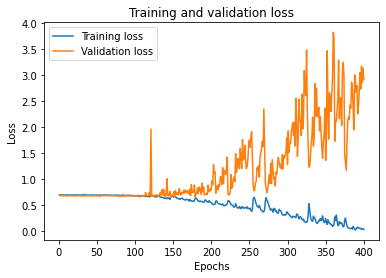

In [150]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss') 
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

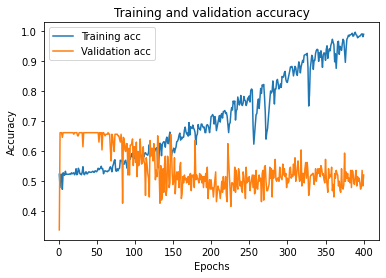

In [151]:
plt.clf() # 그래프를 초기화합니다. ['binary_accuracy']['val_binary_accuracy']
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [152]:
train_pred = model.predict(x_train) #훈련값으로 예측 (y_test랑 비교예정)
test_pred = model.predict(x_test) #예측값으로 예측 (y_test랑 비교예정)

In [153]:
print(train_pred.shape)
print(test_pred.shape)

(600, 1)
(192, 1)


In [154]:
print(train_pred)
print(test_pred)


[[5.44222910e-03]
 [9.99979138e-01]
 [9.98328269e-01]
 [3.51832598e-03]
 [3.58356303e-03]
 [9.19558167e-01]
 [9.99999523e-01]
 [9.93052125e-01]
 [9.96065319e-01]
 [7.92501867e-02]
 [9.99999881e-01]
 [9.99766290e-01]
 [9.70632493e-01]
 [9.99222636e-01]
 [2.78634131e-01]
 [9.97365415e-01]
 [1.67448103e-01]
 [1.64699890e-02]
 [9.99855280e-01]
 [2.23569368e-04]
 [8.66034999e-04]
 [4.98005077e-02]
 [5.69432530e-07]
 [7.84731063e-04]
 [9.96655226e-01]
 [4.23214078e-04]
 [3.29693258e-02]
 [9.99870300e-01]
 [9.99782979e-01]
 [1.94063978e-04]
 [9.85707462e-01]
 [1.00030238e-03]
 [9.99982476e-01]
 [3.09555344e-02]
 [1.09085150e-01]
 [8.98773015e-01]
 [9.79889333e-01]
 [9.92248535e-01]
 [2.05713511e-02]
 [4.19228345e-01]
 [1.00000000e+00]
 [9.96824741e-01]
 [2.31338758e-03]
 [9.96076524e-01]
 [1.96173787e-02]
 [1.00000000e+00]
 [1.10049150e-03]
 [3.76365217e-03]
 [1.19576547e-02]
 [1.26096402e-05]
 [9.81516898e-01]
 [7.47171638e-04]
 [9.99958396e-01]
 [9.99994040e-01]
 [1.00000000e+00]
 [9.923681

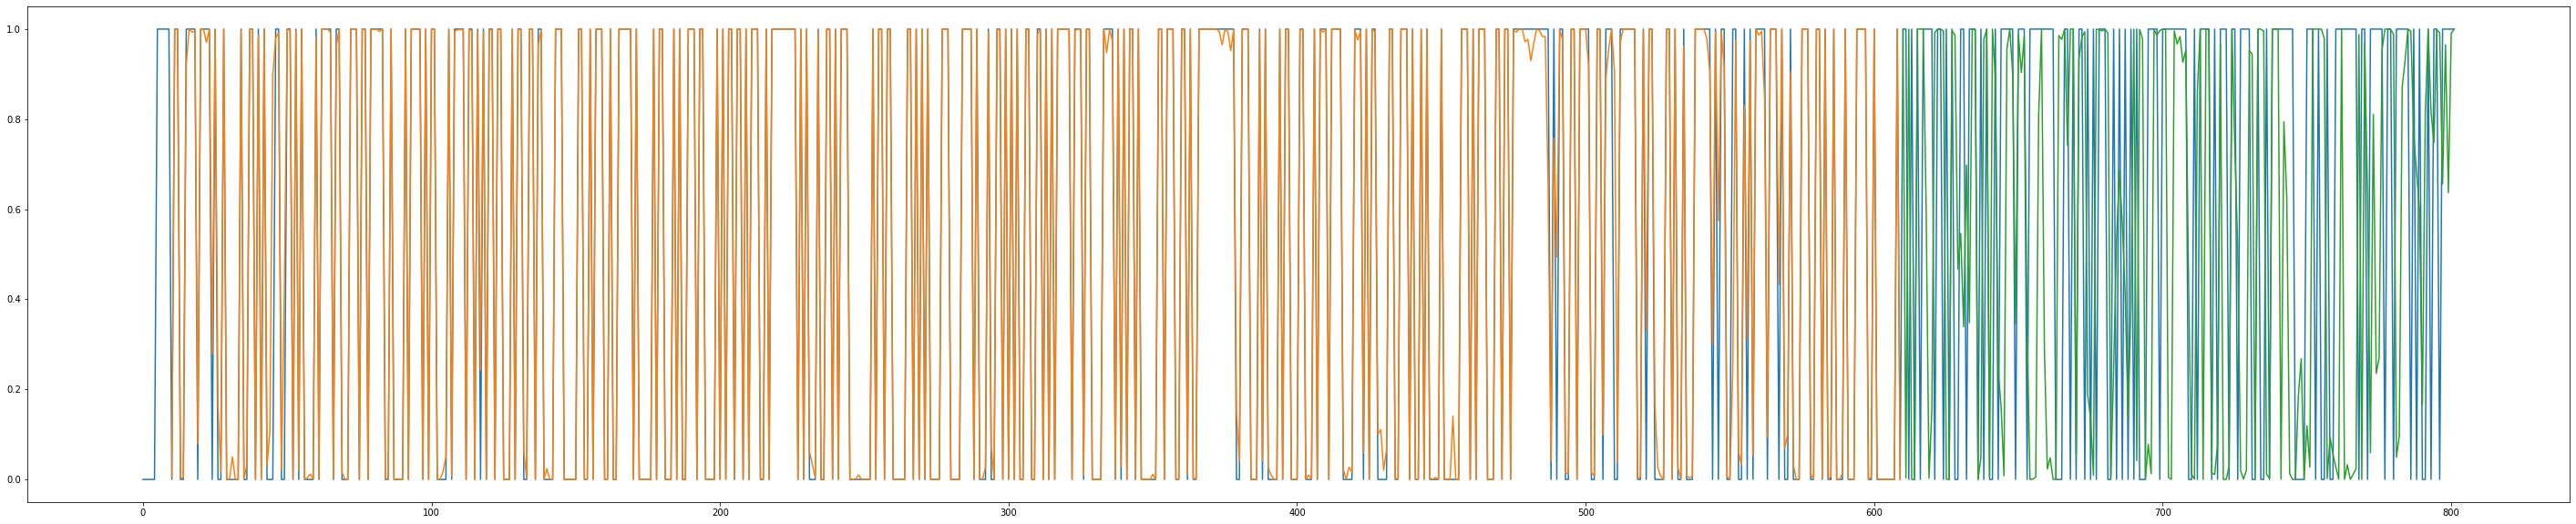

In [155]:
plt.figure(figsize=(50,10))
plt.plot(y)

split = 기준 + 기간
plt.plot(np.arange(기간, split, 1), train_pred ) #트레인값출력
plt.plot(np.arange(split, split +len(test_pred),1), test_pred) #테스트값출력

In [156]:
print(train_pred.shape)
print(y_train.shape)

(600, 1)
(600,)


In [157]:
a=[]

for i in range(len(y_train)):

    if ( (train_pred[i] >0.5 ) & (y_train[i] >0.5) ) |  ( (train_pred[i] <0.5 ) & (y_train[i] <0.5) ):
        a.append(1)


In [158]:
sum(a)/len(y_train) *100

99.33333333333333

# → 감성어방향 예측/ 주가 방향일치 트레인 99%

In [159]:
print(test_pred.shape)
print(y_test.shape)

(192, 1)
(192,)


In [160]:
b=[]

for i in range(len(y_test)):

    if ( (test_pred[i] >0.5 ) & (y_test[i] >0.5) ) |  ( (test_pred[i] <0.5 ) & (y_test[i] <0.5) ):
        b.append(1)


In [161]:
sum(b)/len(y_test) *100

52.083333333333336

# → 감성어방향 예측/ 주가 방향일치 테스트 52%

In [162]:
# # 예측 성능 출력하는 함수 만들기(트레인) 회귀모델이아니라 분류모델이라 f1을 활용하였다.

# from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

# def 확인결과1(y_train, train_pred):
#   MAE= mean_absolute_error(y_train, train_pred)
#   RMSE= np.sqrt(mean_squared_error(y_train, train_pred))
# #   MSLE= mean_squared_log_error(y_test,  test_pred)
# #    RMSLE= np.sqrt(mean_squared_log_error(y_test,  test_pred))
#   R2= r2_score(y_train, train_pred)

#   pd.options.display.float_format='{:.5f}'.format 
#   Result=pd.DataFrame(data=[MAE, RMSE, R2], index=['MAE', 'RMSE', 'R2'], columns=['Results'])
#   return Result

# 확인결과1(y_train, train_pred)

In [163]:
# # 예측 성능 출력하는 함수 만들기(테스트)

# from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

# def 확인결과2(y_test, test_pred):
#   MAE= mean_absolute_error(y_test, test_pred)
#   RMSE= np.sqrt(mean_squared_error(y_test, test_pred))
# #   MSLE= mean_squared_log_error(y_test,  test_pred)
# #    RMSLE= np.sqrt(mean_squared_log_error(y_test,  test_pred))
#   R2= r2_score(y_test, test_pred)

#   pd.options.display.float_format='{:.5f}'.format 
#   Result=pd.DataFrame(data=[MAE, RMSE, R2], index=['MAE', 'RMSE', 'R2'], columns=['Results'])
#   return Result

# 확인결과2(y_test, test_pred)

# F1검증


In [164]:
train_pred[:10]

array([[0.00544223],
       [0.99997914],
       [0.99832827],
       [0.00351833],
       [0.00358356],
       [0.91955817],
       [0.9999995 ],
       [0.9930521 ],
       [0.9960653 ],
       [0.07925019]], dtype=float32)

In [165]:
test_pred[:10]

array([[9.99996662e-01],
       [3.15093016e-03],
       [9.99765337e-01],
       [7.04607553e-11],
       [1.01016285e-05],
       [9.99984860e-01],
       [9.99970555e-01],
       [9.99998808e-01],
       [6.07832491e-01],
       [2.69697001e-03]], dtype=float32)

In [166]:
a1=[] #트레인값(회귀) binary(이진분류)로 변환
for i in train_pred:
  if i>=0.5:
    a1.append(1)
  else:
    a1.append(0)

In [167]:
b1=[] #테스트값(회귀) binary(이진분류)로 변환
for i in test_pred:
  if i>=0.5:
    b1.append(1)
  else:
    b1.append(0)

In [168]:
a2=np.array(a1)
b2=np.array(b1)

In [169]:
a2

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,

In [170]:
print(np.unique(a2))
print(np.unique(b2))
print(np.unique(y_train))
print(np.unique(y_test))




[0 1]
[0 1]
[0. 1.]
[0. 1.]


In [171]:
print(a2)
print(b2)

[0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1
 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1
 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1
 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0
 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1
 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0
 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1
 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0
 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 0 0 1 1 0 1 1 1 1 0 

In [172]:
# test_pred1=test_pred.flatten().tolist() 은정이코드(똑같은결과)

# for i in range(len(test_pred1)):
#   if test_pred[i] >=0.5:
#     test_pred1[i]=1
#   else:
#     test_pred1[i]=0

# test_pred2=np.array(test_pred1)

In [173]:
print(a2.shape)
print(b2.shape)
print(y_train.shape)
print(y_test.shape)

(600,)
(192,)
(600,)
(192,)


In [174]:
from sklearn import metrics #트레인예측 검증

print('accuracy:', metrics.accuracy_score(y_train, a2))
print('roc_auc_score', metrics.roc_auc_score(y_train, a2))
print('precision:', metrics.precision_score(y_train, a2))
print('recall:', metrics.recall_score(y_train, a2))
print('f1_score:', metrics.f1_score(y_train, a2))



accuracy: 0.9933333333333333
roc_auc_score 0.9931628880673465
precision: 0.990506329113924
recall: 0.9968152866242038
f1_score: 0.9936507936507937


In [175]:
from sklearn import metrics #테스트예측 검증

print('accuracy:', metrics.accuracy_score(y_test, b2))
print('roc_auc_score', metrics.roc_auc_score(y_test, b2))
print('precision:', metrics.precision_score(y_test, b2))
print('recall:', metrics.recall_score(y_test, b2))
print('f1_score:', metrics.f1_score(y_test, b2))



accuracy: 0.5208333333333334
roc_auc_score 0.4988491823137492
precision: 0.6605504587155964
recall: 0.5669291338582677
f1_score: 0.6101694915254238


In [176]:
# from sklearn.metrics import r2_score 의미없음


# x_pred = [v[0] for v in model.predict(x_train)]


# print(r2_score(x_pred , list(y_train)))


# score_dict = {
#     'dl' : x_pred ,
#     'real' : y_train
# }

# pred_df = pd.DataFrame(score_dict)

# lims = [
#     np.min([pred_df.min().min(), pred_df.min().min()]),  # min of both axes
#     np.max([pred_df.max().max(), pred_df.max().max()]),  # max of both axes
# ]

# # now plot both limits against eachother
# plt.figure(figsize=(10,10))
# plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
# plt.scatter(pred_df.real, pred_df.dl, marker='o', label='lr')
# plt.xlabel('real')
# plt.ylabel('pred')
# plt.grid()
# plt.legend()
# plt.show()

In [177]:
# from sklearn.metrics import r2_score 의미없음


# y_pred = [v[0] for v in model.predict(x_test)]


# print(r2_score(y_pred, list(y_test)))


# score_dict = {
#     'dl' : y_pred,
#     'real' : y_test
# }

# pred_df = pd.DataFrame(score_dict)

# lims = [
#     np.min([pred_df.min().min(), pred_df.min().min()]),  # min of both axes
#     np.max([pred_df.max().max(), pred_df.max().max()]),  # max of both axes
# ]

# # now plot both limits against eachother
# plt.figure(figsize=(10,10))
# plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
# plt.scatter(pred_df.real, pred_df.dl, marker='o', label='lr')
# plt.xlabel('real')
# plt.ylabel('pred')
# plt.grid()
# plt.legend()
# plt.show()